In [1]:
import pandas as pd
import seaborn as sns
import scipy as sc
import numpy as np
from preprocessing import preprocessing
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set_theme("notebook")

In [2]:
df = preprocessing(
    [
        'wicket'
        , 'Pitch X Bins'
        , 'Pitch Y Bins'
        , 'Ball Speed'
        , 'At Stumps X Bins'
        , 'At Stumps Y Bins'
        , 'Over'
        , 'Movement In Air'
        , 'Movement Off Pitch'
        , 'MatchInnings'
        , 'run_rate'
        , 'wicket_last_six_deliveries'
        , 'running_wickets'
        , 'Bounce Angle'
        , 'Match Id'
        , 'Bounce Angle Delta'
        , 'Drop Angle'
        , 'Bowler Style'
        , 'Bowler Hand'
        , 'Striker Hand'
        , 'runs_last_6_balls'
        , 'runs_last_9_balls'
        , 'runs_last_12_balls'
        , 'dot_balls_last_6_balls'
        , 'dot_balls_last_9_balls'
        , 'dot_balls_last_12_balls'
        , 'Ball In Over'
        , 'Bat Score'
        , 'Venue'
    ]
)

C:\Users\anude\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3448: DtypeWarning: Columns (0,46) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


## High Level Stats

In [3]:
print(f"There have been {df['Match Id'].nunique()} matches in this dataset, with a total of {df['Bat Score'].sum()} runs scored, which is an average of {df['Bat Score'].sum()/df['Match Id'].nunique()} per match")

There have been 797 matches in this dataset, with a total of 210000 runs scored, which is an average of 263.48808030112923 per match


In [4]:
df['Bat Score'].describe()

count    166826.000000
mean          1.258797
std           1.634567
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: Bat Score, dtype: float64

In [12]:
df.groupby(['Match Id', 'MatchInnings']).agg({'Bat Score':'sum'}).reset_index().groupby(['MatchInnings']).agg({'Bat Score':'mean'}).reset_index()

,MatchInnings,Bat Score
0,1,143.618090
1,2,127.483787


<Axes: xlabel='Bat Score', ylabel='Count'>

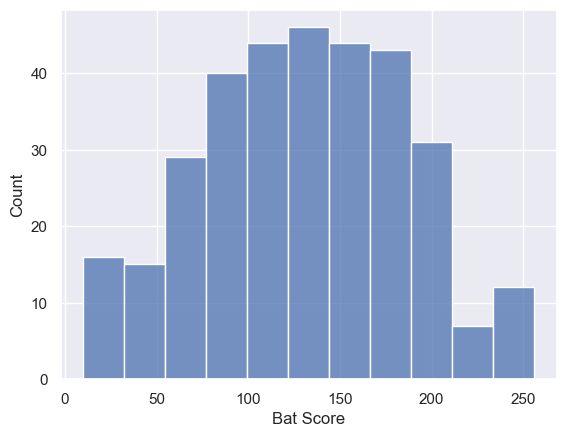

In [16]:
sns.histplot(data=df.loc[df['MatchInnings']<=2].groupby(['Match Id', 'MatchInnings']).agg({'Bat Score':'sum'}).reset_index().groupby(['Bat Score','MatchInnings']).agg({'Match Id':'count'}).reset_index(),x='Bat Score')

<Axes: xlabel='Over', ylabel='Bat Score'>

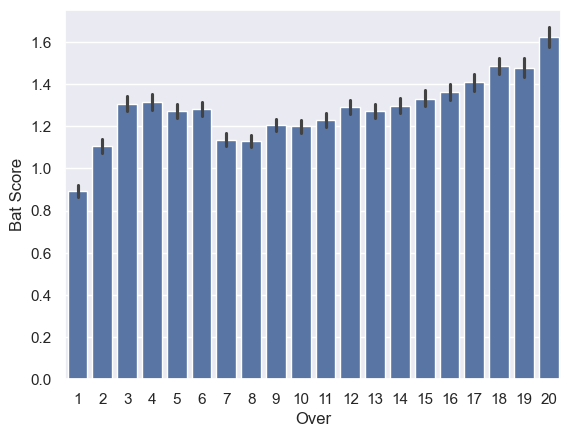

In [54]:
sns.barplot(df,x='Over',y='Bat Score')

<Axes: xlabel='Bat Score', ylabel='Count'>

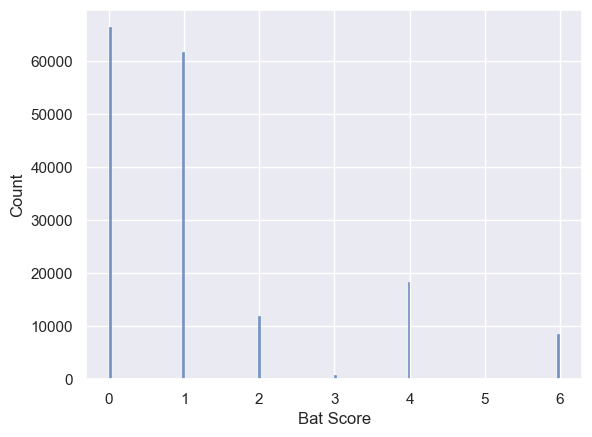

In [18]:
sns.histplot(df['Bat Score'])

<Axes: xlabel='Bowler Style', ylabel='Over'>

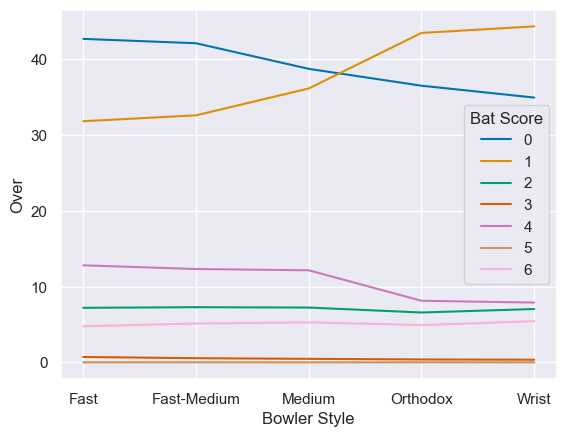

In [23]:
sns.lineplot(((df.groupby(['Bowler Style','Bat Score']).agg({'Over':'count'})/df.groupby(['Bowler Style']).agg({'Over':'count'}))*100).reset_index(),x='Bowler Style',y='Over',hue='Bat Score',palette='colorblind')

<Axes: xlabel='Ball In Over', ylabel='Over'>

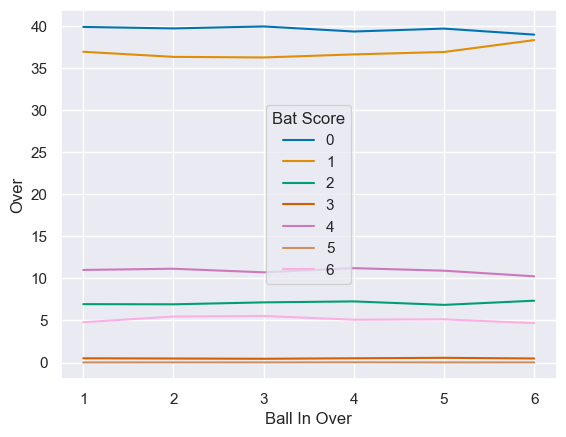

In [25]:
sns.lineplot(((df.loc[df['Ball In Over']<=6].groupby(['Ball In Over','Bat Score']).agg({'Over':'count'})/df.groupby(['Ball In Over']).agg({'Over':'count'}))*100).reset_index(),x='Ball In Over',y='Over',hue='Bat Score',palette='colorblind')

## P(Bat Score)

In [19]:
df['Bat Score'].mean()

1.2679735443740048

In [21]:
df.groupby(['Bat Score']).agg({'Over':'count'})/df.shape[0]

,Over
Bat Score,
0,0.395761
1,0.368160
2,0.070928
3,0.005004
4,0.108906
5,0.000125
6,0.051116


## P(Bat Score) | Innings

In [22]:
df.groupby(['MatchInnings']).agg({'Bat Score':'mean'})

,Bat Score
MatchInnings,
1,1.281772
2,1.252293


## P(Bat Score) | Venue

<Axes: >

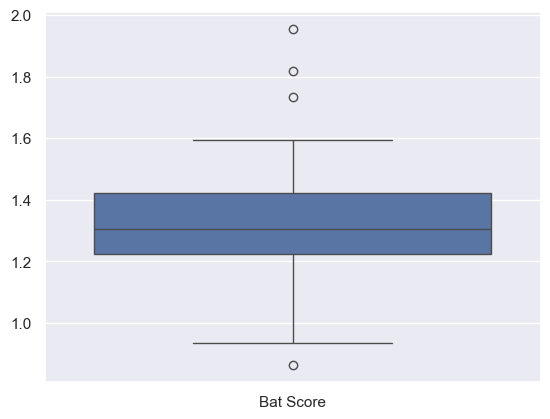

In [29]:
sns.boxplot(df.groupby(['Venue']).agg({'Bat Score':'mean'}))

In [30]:
(df.groupby(['Venue']).agg({'Bat Score':'sum'})/df.groupby(['Venue']).agg({'Bat Score':'count'})).reset_index().sort_values(by='Bat Score',ascending=False)

,Venue,Bat Score
82,Supersport Park - Centurion,1.954178
91,VCA Stadium Nagpur,1.817073
53,Mohali,1.732456
60,North Sydney Oval,1.594203
7,Barsapara Cricket Stadium,1.586558
...,...,...
42,Kardinia Park,1.056286
52,Mirpur Stadium,1.006809
1,Abu Dhabi CC,0.964912
4,Arnos Vale,0.934426


## P(Bat Score) | Over

<Axes: xlabel='Over', ylabel='Bat Score'>

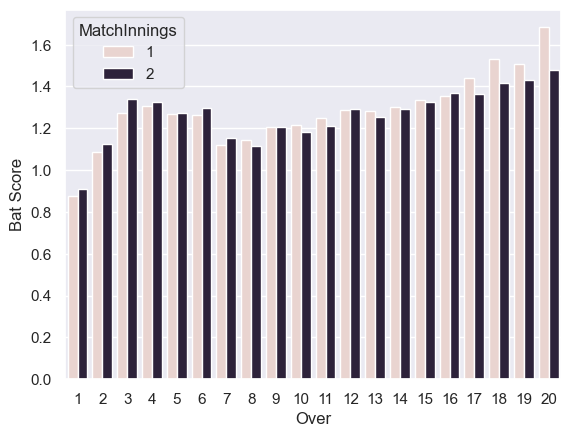

In [34]:
sns.barplot(data=df.loc[df['MatchInnings']<=2].groupby(['MatchInnings', 'Over']).agg({'Bat Score':'mean'}).reset_index(),x='Over',y='Bat Score',hue='MatchInnings')

In [44]:
df_plot = (df.groupby(['Over','Bat Score']).agg({'Ball In Over':'count'})/df.groupby(['Over']).agg({'Ball In Over':'count'})).reset_index()

C:\Users\anude\AppData\Local\Temp\ipykernel_13888\1417233816.py:10: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(data=counts, x='Over', y='proportion', hue='Bat Score', marker='o',palette=palette)


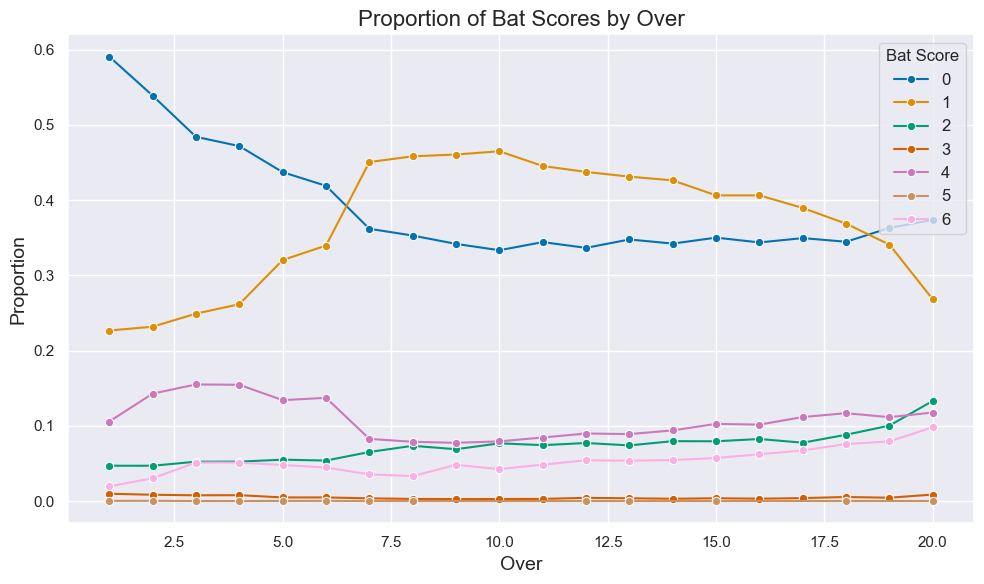

In [5]:
# Step 1: Count occurrences of each Bat Score in each Over
counts = df.groupby(['Over', 'Bat Score']).size().reset_index(name='count')

# Step 2: Calculate proportions
counts['proportion'] = counts.groupby('Over')['count'].transform(lambda x: x / x.sum())

# Step 3: Plot the line plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("colorblind")
sns.lineplot(data=counts, x='Over', y='proportion', hue='Bat Score', marker='o',palette=palette)

# Customization
plt.title("Proportion of Bat Scores by Over", fontsize=16)
plt.xlabel("Over", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.legend(title="Bat Score", fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
((df.loc[df['Bat Score']==3].shape[0])/df.shape[0])*100

0.5003667766002493

<Axes: xlabel='Over'>

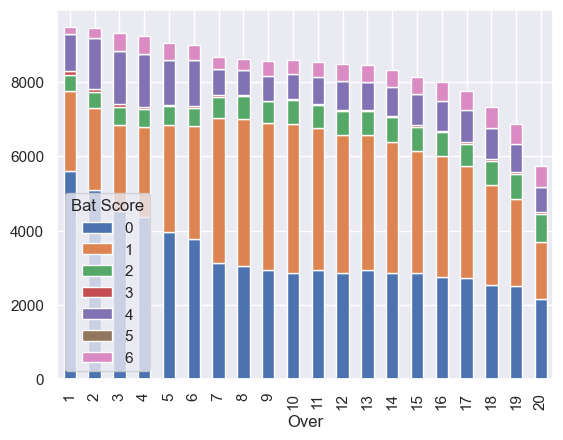

In [40]:
df_plot.plot(kind='bar', stacked=True)